In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import HTML

# COVID-19 data

Total

In [2]:
world_ts = pd.read_csv('output_data/time_series/ts_world_covid19.csv')
world_ts['Date_Confirmed'] = pd.DatetimeIndex(world_ts['Date_Confirmed'])
world_ts = world_ts[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [3]:
mexico_ts = pd.read_csv('output_data/time_series/ts_mexico_covid19.csv')
mexico_ts['Date_Confirmed'] = pd.DatetimeIndex(mexico_ts['Date_Confirmed'])
mexico_ts['Mexico'] = mexico_ts.sum(axis=1) # Sum rows for Mexico total

Daily

In [4]:
world_delta = pd.read_csv('output_data/time_series/delta_world_covid19.csv')
world_delta['Date_Confirmed'] = pd.DatetimeIndex(world_delta['Date_Confirmed'])
world_delta = world_delta[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [5]:
mexico_delta = pd.read_csv('output_data/time_series/delta_mexico_covid19.csv')
mexico_delta['Date_Confirmed'] = pd.DatetimeIndex(mexico_delta['Date_Confirmed'])
mexico_delta['Mexico'] = mexico_delta.sum(axis=1) # Sum rows for Mexico total

# Tables

In [6]:
import janitor

In [7]:
# Only sensible way to filter data smh
world_ts = world_ts.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
mexico_ts = mexico_ts.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
world_delta = world_delta.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
mexico_delta = mexico_delta.filter_date('Date_Confirmed','2020-02-25','2020-04-10')

In [8]:
ts_totals = world_ts.merge(mexico_ts, on='Date_Confirmed', how='outer')
ts_totals = ts_totals.fillna(method='ffill') # First fill missing time series totals with previous row value
ts_totals = ts_totals.replace(0, np.nan) # Now convert 0 to NaN

In [12]:
ts_daily = world_delta.merge(mexico_delta, on='Date_Confirmed', how='outer')

In [10]:
ts_totals.to_csv('output_data/time_series/totals.csv', index=False)
ts_daily.to_csv('output_data/time_series/daily.csv', index=False)

# Plots

In [102]:
from numpy import *
import math
import matplotlib.pyplot as plt

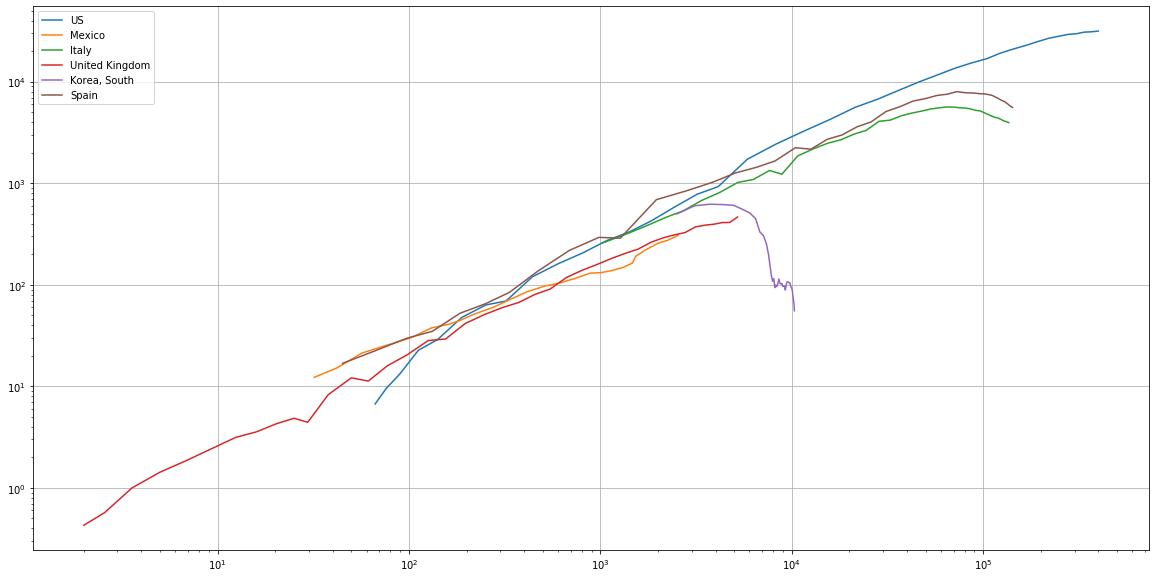

In [103]:
plt.figure(figsize=(20,10))

for region in ['US','Mexico','Italy','United Kingdom','Korea, South','Spain']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()

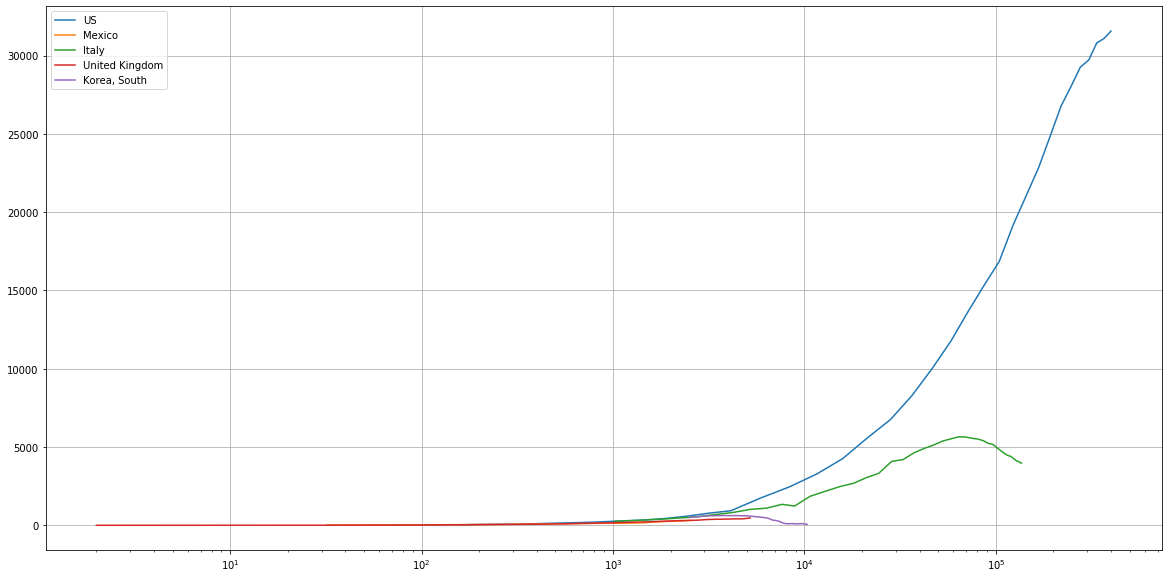

In [104]:
plt.figure(figsize=(20,10))

for region in ['US','Mexico','Italy','United Kingdom','Korea, South']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('log')
plt.grid(True)

plt.show()

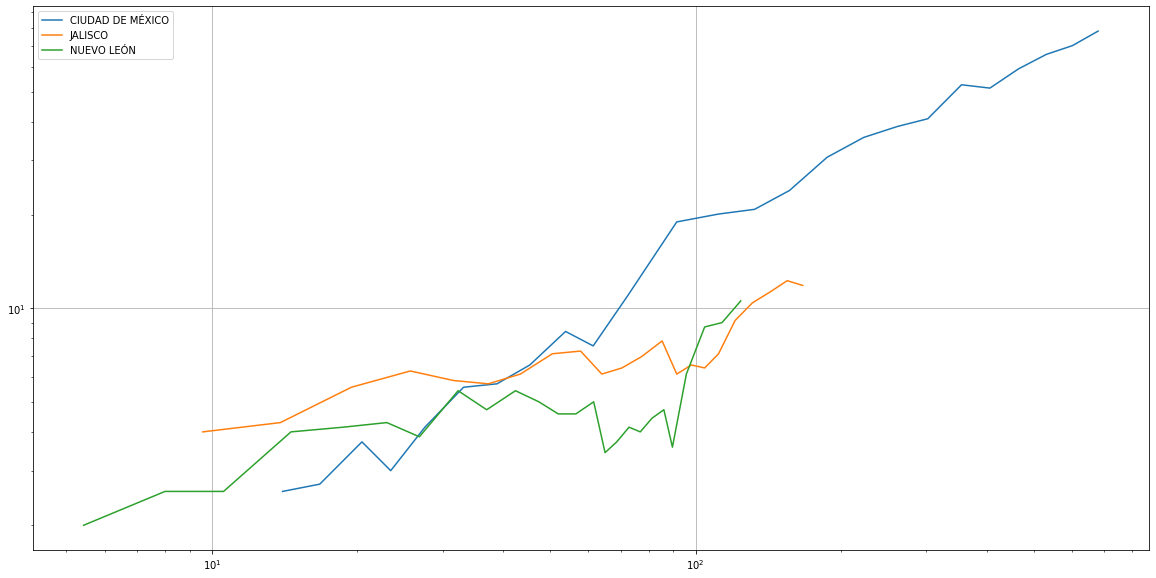

In [106]:
plt.figure(figsize=(20,10))

for state in ['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()